In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [3]:
print(x_train.shape,x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


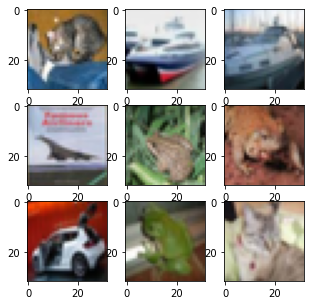

In [4]:
%matplotlib inline
fig,axis=plt.subplots(3,3,figsize=(5,5))
for i,j in enumerate(axis.flat):
    j.imshow(x_test[i])
    #j.set_title('{}'.format(y_train[i]))

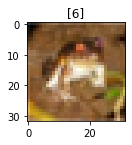

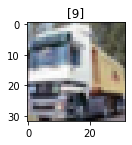

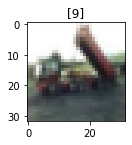

In [5]:
for i in range(0,3):                             #For checking particular images in the dataset at some index position.
    ax=plt.subplot(132)
    plt.imshow(x_train[i])
    ax.axis('on')
    ax.set_title('{}'.format(y_train[i]))
    plt.show()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)  # we do this because to make sure that the array has 4-dimensions with each pic's 
x_test=x_test.reshape(x_test.shape[0],32,32,3)   # hxw=32x32 and rgb color coded
x_train=x_train.astype('float32') # To not lose the precisness we convert to float and a 32 bit value to decrease the storage 
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
print(y_train[0])
y_train=tf.keras.utils.to_categorical(y_train,10)
print(y_train[0])
y_test=tf.keras.utils.to_categorical(y_test,10)

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,MaxPool2D,Conv2D,Flatten

In [9]:
seq=Sequential()
# Convulational Layers(image preprocessing layer)
seq.add(Conv2D(filters=50,kernel_size=(3,3),strides=1,padding='same',activation='relu')) #need to add an input shape argument
seq.add(Conv2D(filters=75,kernel_size=(3,3),strides=1,padding='same',activation='relu')) #if we didn't change the shape before
seq.add(MaxPool2D(pool_size=2))
seq.add(Dropout(rate=0.25)) #randomly sets some values in the array to 0 but makes the same unchanging but scaling the remaining
#with 1/(1-rate) "ps:rate is the frequency by which the values become 0"
seq.add(Conv2D(filters=125,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
seq.add(MaxPool2D(pool_size=2))
seq.add(Dropout(rate=0.25))
seq.add(Flatten())
# Hidden layers (neurons)
seq.add(Dense(units=500,activation='relu'))
seq.add(Dropout(rate=0.4))
seq.add(Dense(units=250,activation='relu'))
seq.add(Dropout(rate=0.3))
# Outpout layer
seq.add(Dense(units=10,activation='softmax'))
# Compiling
seq.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Training model
seq.fit(x_train,y_train,batch_size=256,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
196/196 [==============================] - 157s 794ms/step - loss: 1.7609 - accuracy: 0.3486 - val_loss: 1.4127 - val_accuracy: 0.4942
Epoch 2/10
196/196 [==============================] - 155s 792ms/step - loss: 1.2641 - accuracy: 0.5447 - val_loss: 1.1131 - val_accuracy: 0.6096
Epoch 3/10
196/196 [==============================] - 154s 787ms/step - loss: 1.0291 - accuracy: 0.6372 - val_loss: 0.8645 - val_accuracy: 0.7001
Epoch 4/10
196/196 [==============================] - 154s 788ms/step - loss: 0.8912 - accuracy: 0.6883 - val_loss: 0.8097 - val_accuracy: 0.7248
Epoch 5/10
196/196 [==============================] - 157s 803ms/step - loss: 0.7914 - accuracy: 0.7236 - val_loss: 0.7605 - val_accuracy: 0.7381
Epoch 6/10
196/196 [==============================] - 162s 827ms/step - loss: 0.7136 - accuracy: 0.7517 - val_loss: 0.7176 - val_accuracy: 0.7515
Epoch 7/10
196/196 [==============================] - 171s 873ms/step - loss: 0.6492 - accuracy: 0.7735 - val_loss: 0.6987 -

In [10]:
classes=range(10)
names=["airplane",
       "automobile",
       "bird",
       "cat",
       "deer",
       "dog",
       "frog",
       "horse",
       "ship",
       "truck"]
class_labels=dict(zip(classes,names))

In [11]:
batch_score=x_test[:]
labels_score=np.argmax(y_test[:],axis=-1)

In [12]:
predictions_score=seq.predict(batch_score,verbose=1) #verbose is meant to show the progress bar of the predictions

313/313 [==============================] - 9s 29ms/step


In [13]:
class_result_score=np.argmax(predictions_score,axis=-1)

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_score,class_result_score))

0.7773


In [15]:
batch=x_test[0:9]
labels=np.argmax(y_test[0:9],axis=-1)

In [16]:
predictions=seq.predict(batch,verbose=1)

1/1 [==============================] - 0s 22ms/step


In [17]:
for image in predictions: # Adding the predicted values of a image being any of the particular outputs
    print(np.sum(image))  # the total probability must be close to 1.If it isn't there might be overfitting or model is not good

1.0
0.99999994
1.0000001
1.0
0.9999999
1.0000001
0.99999994
1.0
0.9999999


In [18]:
class_result=np.argmax(predictions,axis=-1)
print(class_result)

[3 8 8 0 6 6 1 6 3]


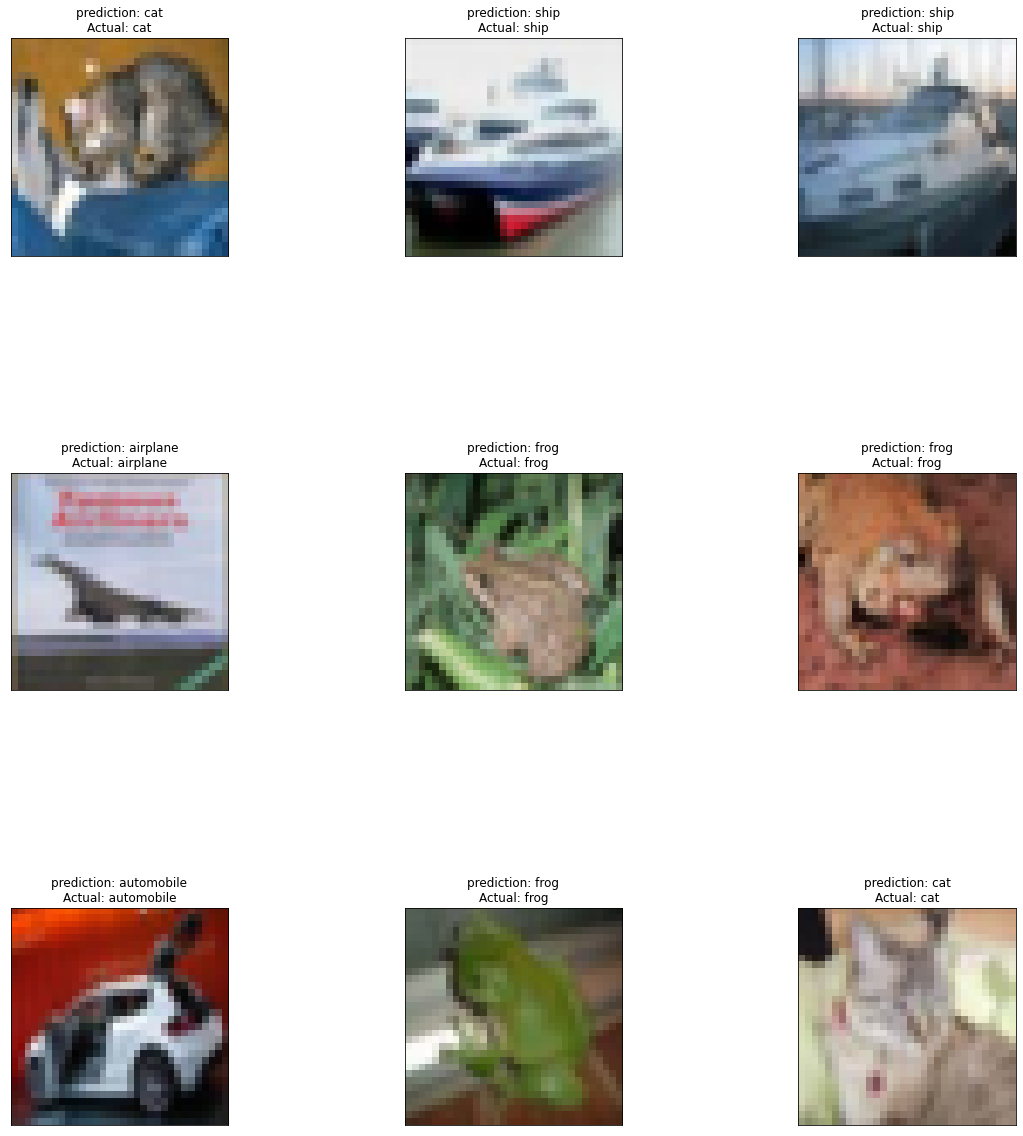

In [19]:
fig,axs=plt.subplots(nrows=3,ncols=3,figsize=(20,20))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()
for i,img in enumerate(batch):
    for key,value in class_labels.items():
        if class_result[i]==key:
            title='prediction: {}\nActual: {}'.format(class_labels[key],class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
    axs[i].imshow(img)
plt.show()